# Lasso Regression : 
Perform regression on Titanic Dataset.

In [14]:
%matplotlib inline
import re
import random
import pandas as pd
import numpy as np
import csv as csv
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [15]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import classification_report
from statsmodels.graphics import mosaicplot
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix

In [16]:
!pip install keras
!pip install fancyimpute

In [17]:
import fancyimpute 

random.seed(100)
np.random.seed(5)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
matplotlib.style.use('ggplot')

In [19]:
train = pd.read_csv('train.csv', header=0)
test = pd.read_csv('test.csv', header=0)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [20]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000,891.000,891.000,714.000,891.000,891.000,891.000
mean,446.000,0.384,2.309,29.699,0.523,0.382,32.204
std,257.354,0.487,0.836,14.526,1.103,0.806,49.693
min,1.000,0.000,1.000,0.420,0.000,0.000,0.000
25%,223.500,0.000,2.000,20.125,0.000,0.000,7.910
50%,446.000,0.000,3.000,28.000,0.000,0.000,14.454
75%,668.500,1.000,3.000,38.000,1.000,0.000,31.000
max,891.000,1.000,3.000,80.000,8.000,6.000,512.329


In [21]:
pd.crosstab(train.Survived, train.Sex)

Sex,female,male
Survived,,
0,81,468
1,233,109


In [22]:
pd.crosstab(train.Survived, train.Sex, normalize=True)

Sex,female,male
Survived,,
0,0.091,0.525
1,0.262,0.122


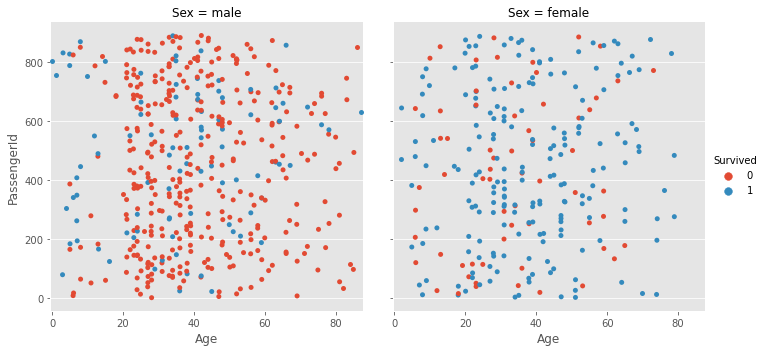

In [23]:
g = sns.catplot(x='Age', y='PassengerId', hue='Survived', col='Sex', kind='strip', data=train);
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=20))
plt.show()

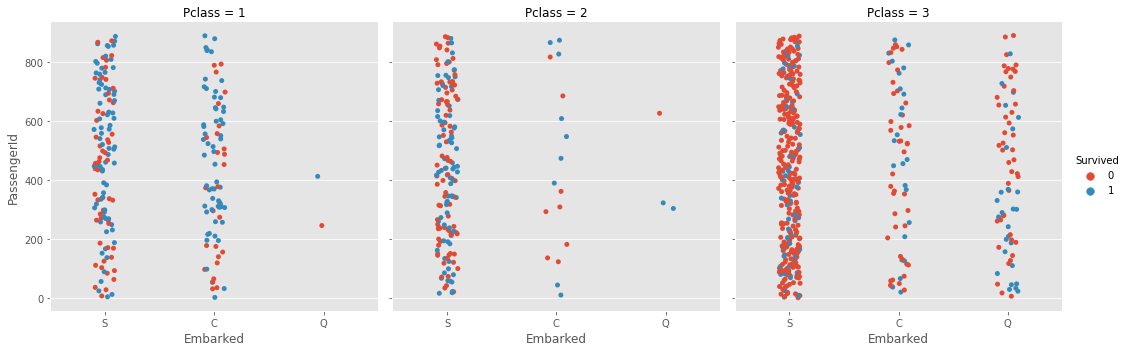

In [24]:
sns.catplot(x="Embarked", y="PassengerId", hue="Survived", col="Pclass", kind="strip", data=train);

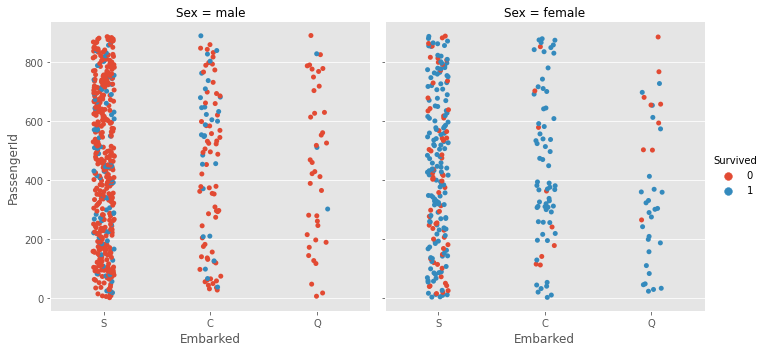

In [25]:
sns.catplot(x="Embarked", y="PassengerId", hue="Survived", col="Sex", kind="strip", data=train);

In [26]:
survived = train['Survived']
test['Survived'] = 0
all_titanic = train.append(test, ignore_index=True)

In [13]:
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [27]:
def create_titles(names):
    return [re.split(', |\. ', name)[1] for name in all_titanic.Name]
    
def title_dist():
    unique_titles = all_titanic['Title'].unique()
    n_passengers = [sum(all_titanic['Title'] == title) for title in unique_titles]
    age_missing = [sum((all_titanic['Title'] == title) & (pd.isnull(all_titanic['Age']))) for title in unique_titles]
    min_age = [min(all_titanic.loc[all_titanic['Title'] == title, 'Age']) for title in unique_titles]
    max_age = [max(all_titanic.loc[all_titanic['Title'] == title, 'Age']) for title in unique_titles]

    title_dist = pd.DataFrame({'Title': unique_titles, 'NumPassengers': n_passengers, 'AgeMissing': age_missing, 'MinAge': min_age, 'MaxAge': max_age})
    title_dist.columns.tolist()

    return(title_dist[['Title', 'NumPassengers', 'AgeMissing', 'MinAge', 'MaxAge']])

all_titanic['Title'] = create_titles(all_titanic.Name)
title_dist()

,Title,NumPassengers,AgeMissing,MinAge,MaxAge
0,Mr,757,176,11.000,80.000
1,Mrs,197,27,14.000,76.000
2,Miss,260,50,0.170,63.000
3,Master,61,8,0.330,14.500
4,Don,1,0,40.000,40.000
5,Rev,8,0,27.000,57.000
6,Dr,8,1,23.000,54.000
7,Mme,1,0,24.000,24.000
8,Ms,2,1,28.000,28.000
9,Major,2,0,45.000,52.000


In [28]:
def condense_titles(df):
    df.loc[(df['Title'] == 'Mr') & 
        (df['Age'] <= 14.5) & 
        (pd.notnull(df['Age'])), 'Title'] = 'Master'

    df.loc[(df['Title'] == 'Capt') |
            (df['Title'] == 'Col') |
            (df['Title'] == 'Don') |
            (df['Title'] == 'Major') |
            (df['Title'] == 'Rev') |
            (df['Title'] == 'Jonkheer') |
            (df['Title'] == 'Sir'), 'Title'] = 'Mr'

    df.loc[(df['Title'] == 'Dona') |
            (df['Title'] == 'Mlle') |
            (df['Title'] == 'Mme'), 'Title'] = 'Ms'

    df.loc[(df['Title'] == 'Lady') | (df['Title'] == 'the Countess'), 'Title'] = 'Mrs'

    df.loc[(df['Title'] == 'Dr') & (df['Sex'] == 'female'), 'Title'] = 'Ms'
    df.loc[(df['Title'] == 'Dr') & (df['Sex'] == 'male'), 'Title'] = 'Mr'
    
    return(df)

all_titanic = condense_titles(all_titanic)

In [29]:
title_dist()

,Title,NumPassengers,AgeMissing,MinAge,MaxAge
0,Mr,777,177,15.000,80.000
1,Mrs,199,27,14.000,76.000
2,Miss,260,50,0.170,63.000
3,Master,66,8,0.330,14.500
4,Ms,7,1,24.000,49.000


In [5]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [30]:
all_titanic['FamilySize'] = (all_titanic['SibSp'] + all_titanic['Parch']) <= 3
all_titanic['FamilySize'] = all_titanic['FamilySize'].astype(int)

In [31]:
all_titanic['Mother'] = (all_titanic['Title'] == 'Mrs') & (all_titanic['Parch'] > 0)
all_titanic['Mother'] = all_titanic['Mother'].astype(int)

In [32]:
all_titanic['Single'] = all_titanic['SibSp'] + all_titanic['Parch'] + 1 == 1
all_titanic['Single'] = all_titanic['Single'].astype(int)

In [33]:
all_titanic['FamilyName'] = [re.split(', ', name)[0] for name in all_titanic['Name']]

In [34]:
family_ticket = all_titanic.loc[all_titanic['Single'] == 0, ['FamilyName', 'Ticket']]
family_ticket = family_ticket.sort_values('FamilyName')
family_ticket.head()

,FamilyName,Ticket
746,Abbott,C.A. 2673
1283,Abbott,C.A. 2673
279,Abbott,C.A. 2673
874,Abelson,P/PP 3381
308,Abelson,P/PP 3381


In [36]:
last_digits = [ticket[-3:] for ticket in all_titanic['Ticket']]
all_titanic['FamilyName'] = all_titanic['FamilyName'] + last_digits

In [37]:
all_titanic['FamilySurvived'] = 0
families = all_titanic.loc[all_titanic['Parch'] + all_titanic['SibSp'] > 0, ]

by_family_name = families.groupby(['FamilyName'])
family_name_survived = by_family_name['Survived'].sum()

In [38]:
family_name_survived = family_name_survived[family_name_survived > 0]
survived_names = family_name_survived.index.values
all_titanic.loc[all_titanic['FamilyName'].isin(survived_names), 'FamilySurvived'] = 1

In [39]:
all_titanic['AgeClass'] = 0
all_titanic.loc[all_titanic['Age'] <= 10, 'AgeClass'] = 1
all_titanic.loc[(all_titanic['Age'] > 10) & (all_titanic['Age'] <= 20), 'AgeClass'] = 2
all_titanic.loc[(all_titanic['Age'] > 20) & (all_titanic['Age'] <= 35), 'AgeClass'] = 3
all_titanic.loc[all_titanic['Age'] >= 35, 'AgeClass'] = 4

In [40]:
cols = [col for col in all_titanic.columns if col not in ['Survived', 'Name', 'PassengerId', 'Ticket', 'AgeClass']]
all_titanic[cols].isnull().sum()

Pclass               0
Sex                  0
Age                263
SibSp                0
Parch                0
Fare                 1
Cabin             1014
Embarked             2
Title                0
FamilySize           0
Mother               0
Single               0
FamilyName           0
FamilySurvived       0
dtype: int64

In [41]:
all_titanic.loc[pd.isnull(all_titanic['Embarked']), 'Embarked'] = 'S'

In [42]:
ports = pd.get_dummies(all_titanic['Embarked'])
titles = pd.get_dummies(all_titanic['Title'])

all_titanic = pd.concat([all_titanic, ports, titles], axis = 1)
all_titanic = all_titanic.drop(['Embarked', 'Title'], axis = 1)

In [43]:
features = ['Pclass', 'SibSp', 'Parch', 'C', 'Q', 'S', 'Master', 'Miss', 'Mr', 'Mrs', 'Ms']

all_fares = all_titanic.loc[pd.notnull(all_titanic['Fare'])]
missing_fare = all_titanic.loc[pd.isnull(all_titanic['Fare'])]

clf = DecisionTreeRegressor(random_state=0)

X = all_fares[features]
y = all_fares['Fare']
clf.fit(X, y)

# # Predict fare based on this
all_titanic.loc[pd.isnull(all_titanic['Fare']), 'Fare']

1043   NaN
Name: Fare, dtype: float64

In [44]:
pd.crosstab(pd.isnull(all_titanic['Age']), all_titanic.Pclass)

Pclass,1,2,3
Age,,,
False,284,261,501
True,39,16,208


In [45]:
from fancyimpute import IterativeImputer as MICE
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000,0,0,111369,30.000,C148,C


In [46]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
def impute_missing_age(columns):
    age = columns[0]
    passenger_class = columns[1]
    if pd.isnull(age):
        if(passenger_class == 1):
            return df[df['Pclass'] == 1]['Age'].mean()
        elif(passenger_class == 2):
            return df[df['Pclass'] == 2]['Age'].mean()
        elif(passenger_class == 3):
            return df[df['Pclass'] == 3]['Age'].mean()
    else:
        return age

In [7]:
df['Age'] = df[['Age', 'Pclass']].apply(impute_missing_age, axis = 1)

In [8]:
df.drop('Cabin', axis=1, inplace = True)
df.dropna(inplace = True)

sex_data = pd.get_dummies(df['Sex'], drop_first = True)
embarked_data = pd.get_dummies(df['Embarked'], drop_first = True)

df = pd.concat([df, sex_data, embarked_data], axis = 1)

df.drop(['Name', 'PassengerId', 'Ticket', 'Sex', 'Embarked'], axis = 1, inplace = True)

df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [9]:
y_data = df['Survived']
x_data = df.drop('Survived', axis = 1)

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3)

In [10]:
lasso = Lasso(alpha = 1)
lasso.fit(x_training_data, y_training_data)
y_pred = lasso.predict(x_test_data)
  
# Calculate Mean Squared Error
mean_squared_error = np.mean((y_pred - y_test_data)**2)
print("Mean squared error on test set", mean_squared_error)
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = x_training_data.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)
  
print(lasso_coeff)

Mean squared error on test set 0.22804701348697684
  Columns  Coefficient Estimate
0  Pclass             -0.000000
1     Age             -0.000000
2   SibSp             -0.000000
3   Parch              0.000000
4    Fare              0.002132
5    male             -0.000000
6       Q              0.000000
7       S             -0.000000


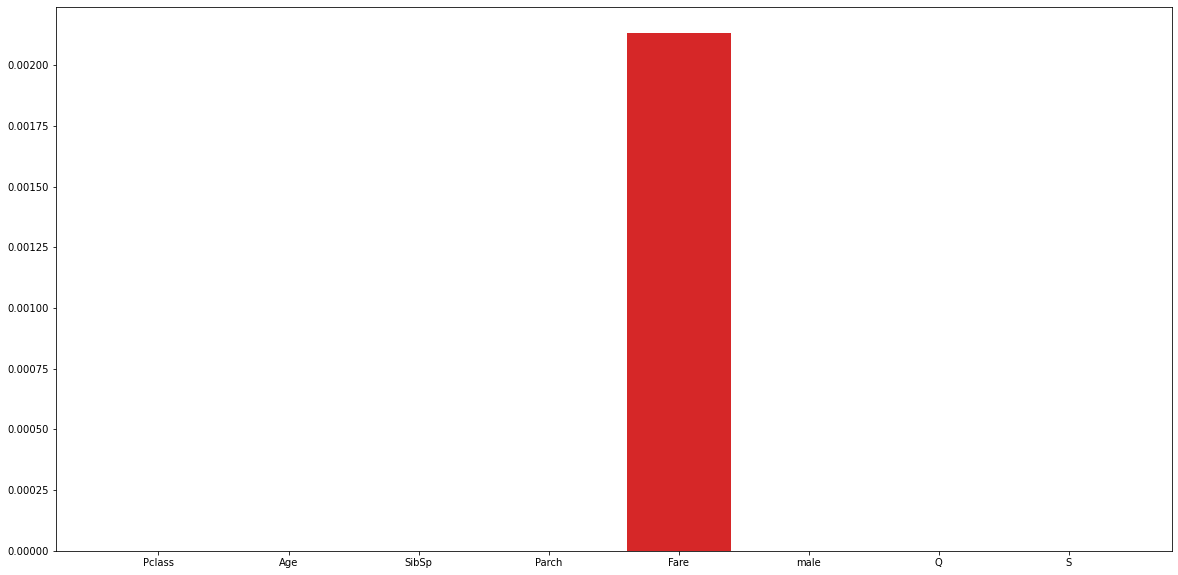

In [11]:
fig, ax = plt.subplots(figsize =(20, 10))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(lasso_coeff["Columns"],
lasso_coeff['Coefficient Estimate'],color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()

In [47]:
lasso.score(x_test_data, y_test_data)

0.047389924734963285